<a href="https://colab.research.google.com/github/IT-17005/Transfer-Learning/blob/master/Schi_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import The Libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive .mount('/content/drive/') 

Mounted at /content/drive/


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path="/content/drive/MyDrive/dataset/data/train"
valid_path="/content/drive/MyDrive/dataset/data/validation"

In [4]:
vgg19 = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=IMAGE_SIZE + [3],
    pooling='max',
    classes=2,
    classifier_activation="softmax",
)

80150528/80134624 [==============================] - 0s 0us/step


In [5]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
# This will let us use the default weights used by the imagenet.  
for layer in vgg19.layers:
    layer.trainable = False

# Set the flatten layer.
x = Flatten() (vgg19.output)
prediction = Dense(2, activation = 'softmax')(x)

# Create a model Object
model = Model(inputs = vgg19.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
# Use the Image Data Generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [8]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 282 images belonging to 2 classes.


In [9]:
test_set = train_datagen.flow_from_directory(
    valid_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary'
)

Found 95 images belonging to 2 classes.


In [10]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
# Fit the model.
hist = model.fit(training_set, validation_data = test_set, steps_per_epoch = 10, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 161s 16s/step - loss: 0.8871 - accuracy: 0.3750 - val_loss: 0.7152 - val_accuracy: 0.5579
Epoch 2/5
10/10 [==============================] - 143s 15s/step - loss: 0.6923 - accuracy: 0.5130 - val_loss: 0.7010 - val_accuracy: 0.5053
Epoch 3/5
10/10 [==============================] - 145s 15s/step - loss: 0.5631 - accuracy: 0.7875 - val_loss: 0.7178 - val_accuracy: 0.4947
Epoch 4/5
10/10 [==============================] - 145s 15s/step - loss: 0.4759 - accuracy: 0.8750 - val_loss: 0.5687 - val_accuracy: 0.7158
Epoch 5/5
10/10 [==============================] - 141s 15s/step - loss: 0.4422 - accuracy: 0.8766 - val_loss: 0.7077 - val_accuracy: 0.5474


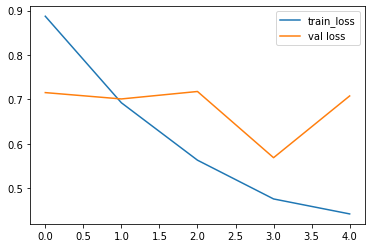

In [12]:
plt.plot(hist.history['loss'], label = 'train_loss')
plt.plot(hist.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

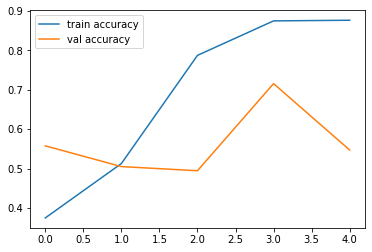

In [13]:
# Plot the Accuracy
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('valAccuracy')